In [1]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import anndata 
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt
import collections
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from umap import UMAP

from matplotlib.colors import LinearSegmentedColormap

from scroutines.config_plots import *
from scroutines import powerplots # .config_plots import *
from scroutines import pnmf
from scroutines import basicu


In [2]:
outdir     = "/u/home/f/f7xiesnm/project-zipursky/v1-bb/v1/results"
outfigdir  = "/u/home/f/f7xiesnm/project-zipursky/v1-bb/ms_reanalysis"

In [3]:
# get updated cell types
f = "/u/home/f/f7xiesnm/project-zipursky/v1-bb/v1/results/allL23_newtypes.csv"
meta = pd.read_csv(f, index_col=0)
meta

/tmp/ipykernel_23843/12491127.py:3: DtypeWarning: Columns (1,4) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv(f, index_col=0)


,Class_broad,Doublet,Doublet Score,batch,leiden,n_counts,n_genes,percent_mito,sample,Type,Subclass,cond,easitype,umap1,umap2,easisample,easicond,newtype
AAACGCTCACTTCATT-1-P8_1a-P8,Excitatory,False,0.025713,1,0,23384.0,4943,0.000128,P8_1a,L2/3_AB,L2/3,P8NR,L2/3_A,NaN,NaN,1a,1-P08NR,L2/3_A
AAAGGATAGGTGCATG-1-P8_1a-P8,Excitatory,False,0.011883,1,0,17774.0,4698,0.000169,P8_1a,L2/3_AB,L2/3,P8NR,L2/3_A,NaN,NaN,1a,1-P08NR,L2/3_A
AAAGGGCCAGTATACC-1-P8_1a-P8,Excitatory,False,0.024667,1,0,15872.0,4173,0.000126,P8_1a,L2/3_AB,L2/3,P8NR,L2/3_A,NaN,NaN,1a,1-P08NR,L2/3_A
AAAGTCCCATATACCG-1-P8_1a-P8,Excitatory,False,0.027921,1,0,20076.0,4761,0.000050,P8_1a,L2/3_AB,L2/3,P8NR,L2/3_A,NaN,NaN,1a,1-P08NR,L2/3_A
AAAGTCCTCAGATGCT-1-P8_1a-P8,Excitatory,False,0.009527,1,4,19061.0,4601,0.000000,P8_1a,L2/3_BC,L2/3,P8NR,L2/3_C,NaN,NaN,1a,1-P08NR,L2/3_C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTCAGTTGTTG-1-P38_dr_1a,NaN,False,0.042872,11,1,11379.0,3568,0.000879,P38_dr_1a,L2/3_3,L2/3,P38DR,L2/3_C,NaN,NaN,1a,2-P38DR,L2/3_B
TTTGGTTTCTGCCTGT-1-P38_dr_2b,NaN,False,0.007108,2,1,16050.0,3104,0.000062,P38_dr_2b,L2/3_3,L2/3,P38DR,L2/3_C,NaN,NaN,2b,2-P38DR,L2/3_B
TTTGTTGCACCGGTCA-1-P38_dr_2a,NaN,False,0.030928,2,1,13955.0,3739,0.001146,P38_dr_2a,L2/3_3,L2/3,P38DR,L2/3_C,NaN,NaN,2a,2-P38DR,L2/3_B
TTTGTTGGTGGCTAGA-1-P38_dr_2b,NaN,False,0.015884,3,4,7272.0,2789,0.000963,P38_dr_2b,L2/3_2,L2/3,P38DR,L2/3_B,NaN,NaN,2b,2-P38DR,L2/3_A


In [4]:
adata = anndata.read("../../data/cheng21_cell_scrna/reorganized/allL23_typegenes_Mar29.h5ad")
genes = adata.var.index.values
conds = adata.obs['cond'].values
types = adata.obs['Type'].values
samps = adata.obs['sample'].values
adata.obs['newtype'] = meta.loc[adata.obs.index, 'newtype']
adata

AnnData object with n_obs × n_vars = 41048 × 286
    obs: 'Class_broad', 'Doublet', 'Doublet Score', 'batch', 'leiden', 'n_counts', 'n_genes', 'percent_mito', 'sample', 'Type', 'Subclass', 'cond', 'easitype', 'umap1', 'umap2', 'newtype'
    obsm: 'X_pca'
    layers: 'log10CP10k', 'zlog10CP10k'

In [5]:
adata_raw = anndata.read("../../data/cheng21_cell_scrna/reorganized/all_L23.h5ad")
assert np.all(adata_raw.obs.index.values == adata.obs.index.values)
counts = adata_raw.X
allgenes = adata_raw.var.index.values
gi = basicu.get_index_from_array(allgenes, genes)
assert np.all(gi != -1)
counts.shape, gi.shape

((41048, 53801), (286,))

In [6]:
rename = {
    "L2/3_A": "L2/3_A",
    "L2/3_B": "L2/3_B",
    "L2/3_C": "L2/3_C",
    
    "L2/3_1": "L2/3_A",
    "L2/3_2": "L2/3_B",
    "L2/3_3": "L2/3_C",
    
    "L2/3_AB": "L2/3_A",
    "L2/3_BC": "L2/3_C",
}
adata.obs['easitype'] = adata.obs['Type'].apply(lambda x: rename[x])

In [7]:
rename = {
    "L2/3_A": "L2/3_A",
    "L2/3_B": "L2/3_B",
    "L2/3_C": "L2/3_C",
    
    "L2/3_1": "L2/3_1",
    "L2/3_2": "L2/3_2",
    "L2/3_3": "L2/3_3",
    
    "L2/3_AB": "L2/3_A",
    "L2/3_BC": "L2/3_C",
}
adata.obs['easitype2'] = adata.obs['Type'].apply(lambda x: rename[x])
cond = adata.obs['cond']=='P28DL' # call P28DL A B C
adata.obs.loc[cond, 'easitype2'] = adata.obs.loc[cond, 'easitype'] #.apply(lambda x: rename[x])

In [8]:
rename_cond = {
    'P8NR':  '1-P08NR', 
    'P14NR': '1-P14NR', 
    'P17NR': '1-P17NR', 
    'P21NR': '1-P21NR', 
    'P28NR': '1-P28NR', 
    'P38NR': '1-P38NR', 
    
    'P28DR': '2-P28DR', 
    'P38DR': '2-P38DR', 
    
    'P28DL': '3-P28DL',
}
adata.obs['easicond']   = adata.obs['cond'].apply(lambda x: rename_cond[x]) #.unique()

In [9]:
adata.obs['easisample'] = adata.obs['sample'].apply(lambda x: x.split('_')[-1]) #.unique()
adata.obs['easibiosample'] = adata.obs['easisample'].apply(lambda x: x[0]) #.unique()

In [10]:
zlognorm = adata.layers['zlog10CP10k']
zlognorm.shape

(41048, 286)

In [11]:
# # use those 286 genes
df = pd.read_csv("../../data/cheng21_cell_scrna/res/L23-ABC-genes-n288-n286unq-annot.csv")
genes_sel = df['gene'].astype(str).values
genes_grp = df['P17on'].astype(str).values
assert np.all(genes_sel == adata.var.index.values)

In [12]:
allcolors = sns.color_palette('tab20c', 20)
allcolors

[(0.19215686274509805, 0.5098039215686274, 0.7411764705882353),
 (0.4196078431372549, 0.6823529411764706, 0.8392156862745098),
 (0.6196078431372549, 0.792156862745098, 0.8823529411764706),
 (0.7764705882352941, 0.8588235294117647, 0.9372549019607843),
 (0.9019607843137255, 0.3333333333333333, 0.050980392156862744),
 (0.9921568627450981, 0.5529411764705883, 0.23529411764705882),
 (0.9921568627450981, 0.6823529411764706, 0.4196078431372549),
 (0.9921568627450981, 0.8156862745098039, 0.6352941176470588),
 (0.19215686274509805, 0.6392156862745098, 0.32941176470588235),
 (0.4549019607843137, 0.7686274509803922, 0.4627450980392157),
 (0.6313725490196078, 0.8509803921568627, 0.6078431372549019),
 (0.7803921568627451, 0.9137254901960784, 0.7529411764705882),
 (0.4588235294117647, 0.4196078431372549, 0.6941176470588235),
 (0.6196078431372549, 0.6039215686274509, 0.7843137254901961),
 (0.7372549019607844, 0.7411764705882353, 0.8627450980392157),
 (0.8549019607843137, 0.8549019607843137, 0.9215686274509803),
 (0.38823529411764707, 0.38823529411764707, 0.38823529411764707),
 (0.5882352941176471, 0.5882352941176471, 0.5882352941176471),
 (0.7411764705882353, 0.7411764705882353, 0.7411764705882353),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627)]

In [13]:
allcolors2 = sns.color_palette('tab10', 20)
allcolors2

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [14]:
palette = collections.OrderedDict({
     "P8NR": allcolors[2],
    "P14NR": allcolors[0],
    
    "P17NR": allcolors[7],
    "P21NR": allcolors[6],
    "P28NR": allcolors[5],
    "P38NR": allcolors[4],
    
    "P28DR": allcolors[14],
    "P38DR": allcolors[12],
    
    "P28DL": allcolors[8],
})

cases = np.array(list(palette.keys()))
cases

array(['P8NR', 'P14NR', 'P17NR', 'P21NR', 'P28NR', 'P38NR', 'P28DR',
       'P38DR', 'P28DL'], dtype='<U5')

In [15]:
palette_types = collections.OrderedDict({
    'L2/3_A': allcolors2[0],
    'L2/3_B': allcolors2[1],
    'L2/3_C': allcolors2[2],
    
    'L2/3_1': allcolors2[0],
    'L2/3_2': allcolors2[1],
    'L2/3_3': allcolors2[2],
    
    'L2/3_AB': allcolors2[0],
    'L2/3_BC': allcolors2[2],
})             

palette_types2 = palette_types.copy()
palette_types2['L2/3_A'] = 'C0' # palette_type['L2/3_A']
palette_types2['L2/3_B'] = 'C1' # palette_type['L2/3_B']
palette_types2['L2/3_C'] = 'C2' # palette_type['L2/3_C']

palette_types2['L2/3_1'] = 'C5' # palette_type['L2/3_A']
palette_types2['L2/3_2'] = 'C6' # palette_type['L2/3_B']
palette_types2['L2/3_3'] = 'C8' # palette_type['L2/3_C']

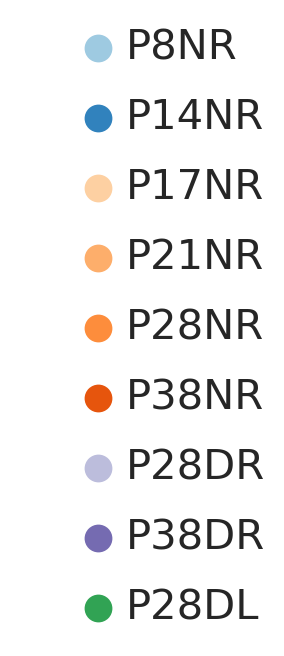

In [16]:
fig, ax = plt.subplots(figsize=(1,4))
for i, (key, item) in enumerate(palette.items()):
    ax.plot(0,     len(palette)-i, 'o', c=item, )
    ax.text(0.02,  len(palette)-i, key, va='center', fontsize=15)
    ax.axis('off')
plt.show()

# heatmap

# give each cell a pseudo-time index

In [17]:
ncell, ngene = zlognorm.shape

my_colors = ('C0', 'C1', 'C2')
cmap_d1 = LinearSegmentedColormap.from_list('', my_colors, len(my_colors))

my_colors = ('C5', 'C6', 'C8', 'C0', 'C1', 'C2',)
cmap_d2 = LinearSegmentedColormap.from_list('', my_colors, len(my_colors))

my_colors = ('C0', 'C1', 'C2', 'C0', 'C1', 'C2',)
cmap_d2v2 = LinearSegmentedColormap.from_list('', my_colors, len(my_colors))

In [18]:
# pd.factorize(ada')
pd.factorize(adata.obs['easitype2'].values, sort=True)

(array([3, 3, 3, ..., 2, 1, 1]),
 array(['L2/3_1', 'L2/3_2', 'L2/3_3', 'L2/3_A', 'L2/3_B', 'L2/3_C'],
       dtype=object))

In [19]:
# Use P28 ordering
f = '../../results/gene_ptime_P28_L23_Mar27.tsv'
gpt = pd.read_csv(f)
gpt = gpt['gene_ptime'].values
geneidx = np.argsort(gpt)

In [20]:
# Use ptime from each sample analysis
dfall = []
for case in cases:
    f = f'../../results/cell_ptime_{case}_L23_Mar28.tsv'
    df = pd.read_csv(f, index_col=0)
    df['case'] = case
    dfall.append(df)
dfall = pd.concat(dfall)

dfall = dfall.loc[adata.obs.index]
assert np.all(dfall.index.values == adata.obs.index.values)
dfall

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC47,PC48,PC49,PC50,type,samp,umap1,umap2,ptime,case
AAACGCTCACTTCATT-1-P8_1a-P8,-4.167515,0.169273,2.574383,-1.589666,2.923386,-0.120249,-1.950705,-1.732618,-1.321194,0.659689,...,0.554465,-0.936461,0.380486,-0.015368,L2/3_AB,P8_1a,10.371646,3.036468,0.276353,P8NR
AAAGGATAGGTGCATG-1-P8_1a-P8,-5.710969,2.632143,-3.127635,2.985007,0.406603,-0.940489,0.612224,2.176416,-0.839287,3.160024,...,0.050299,-1.374758,-1.108813,-0.809501,L2/3_AB,P8_1a,11.195108,2.691917,0.170780,P8NR
AAAGGGCCAGTATACC-1-P8_1a-P8,0.363032,-1.037412,-2.000788,-1.303415,0.173461,-1.057998,-0.028259,-0.368191,0.805563,0.139518,...,-0.068263,-0.248844,-0.860799,0.422525,L2/3_AB,P8_1a,7.659028,1.148404,0.426782,P8NR
AAAGTCCCATATACCG-1-P8_1a-P8,0.603333,-1.386780,-2.359930,-2.483881,0.671093,0.319811,3.409799,-0.692306,0.300376,-0.038912,...,-0.238657,-0.449361,0.308295,0.059158,L2/3_AB,P8_1a,7.774300,1.742997,0.425401,P8NR
AAAGTCCTCAGATGCT-1-P8_1a-P8,6.168784,3.406447,-1.801495,-2.772495,0.837046,-1.310614,-1.121606,1.146195,-1.539873,-2.078232,...,-3.319709,-1.509901,-1.380832,0.662135,L2/3_BC,P8_1a,4.717086,1.385406,0.625315,P8NR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTCAGTTGTTG-1-P38_dr_1a,1.603376,2.800474,1.054118,-2.621499,1.496856,3.133421,-0.524684,1.361778,-0.675490,-1.652105,...,0.693891,0.494570,0.283097,-0.610193,L2/3_3,P38_dr_1a,7.627140,2.115497,0.545054,P38DR
TTTGGTTTCTGCCTGT-1-P38_dr_2b,-3.830772,7.694133,-0.449819,2.001263,1.363460,-3.604184,2.277025,2.689968,-1.778446,1.101287,...,0.812298,1.058447,0.135438,-0.950600,L2/3_3,P38_dr_2b,9.046733,0.693446,0.562204,P38DR
TTTGTTGCACCGGTCA-1-P38_dr_2a,-2.635137,4.027407,-1.084643,1.620008,-0.744443,-0.695006,0.090084,3.042968,-0.855017,-1.101044,...,-1.234141,0.170709,0.457045,0.846405,L2/3_3,P38_dr_2a,9.125484,1.713715,0.498568,P38DR
TTTGTTGGTGGCTAGA-1-P38_dr_2b,-1.907812,0.440405,-0.632879,0.026408,-1.893107,-2.452266,-0.529140,-0.347105,0.620726,0.776882,...,0.859818,0.117613,-0.129171,-0.410174,L2/3_2,P38_dr_2b,9.331425,3.539268,0.478478,P38DR


In [21]:
def plot(zlognorm, cellidx, geneidx, types, genes_grp, case, 
         vmax=3, vmin=-3,
         figsize=(12,6), xticklabels=1000, yticklabels=100, hratio=20, vratio=10):
    """
    """
    mosaic = ("B"+"A"*hratio+"\n")*vratio + "."+"C"*hratio
    # print(mosaic)
    fig, axdict = plt.subplot_mosaic(mosaic, figsize=figsize)
    fig.suptitle(case)
    ax = axdict['A']
    sns.heatmap(zlognorm[cellidx][:,geneidx].T,
                xticklabels=False,
                yticklabels=False,
                cbar_kws=dict(shrink=0.3, label='zscore log10CP10k', aspect=10),
                center=0,
                vmax=vmax,
                vmin=vmin,
                cmap='coolwarm',
                rasterized=True,
                ax=ax,
               )

    ax = axdict['C']
    sns.heatmap(pd.factorize(types[cellidx], sort=True)[0].reshape(-1,1).T, 
                xticklabels=xticklabels,
                yticklabels=False,
                cmap=cmap_d1,
                cbar_kws=dict(ticks=[0,1,2], shrink=2, aspect=5),
                rasterized=True,
                ax=ax, 
               )
    ax.set_xlabel('Cells')
    fig.axes[-1].set_yticklabels(['A','B','C'])
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)

    ax = axdict['B']
    sns.heatmap(pd.factorize(genes_grp[geneidx], sort=True)[0].reshape(-1,1), 
                xticklabels=False,
                yticklabels=yticklabels,
                cmap=cmap_d1,
                cbar=False,
                rasterized=True,
                ax=ax, 
               )
    ax.set_ylabel('Genes')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)

    fig.subplots_adjust(hspace=0.4)
    return fig, axdict
    # fig.suptitle(sample)
    # powerplots.savefig_autodate(fig, os.path.join(outdir_fig, f'heatmap_{sample}_v3.pdf'))
    # plt.show()

In [22]:
def plot_v2(zlognorm, cellidx, geneidx, 
            types, types2,
            cmap, cmap2,
            vmax=3, vmin=-3,
            figsize=(12,6), xticklabels=1000, yticklabels=100, hratio=20, vratio=10):
    """
    """
    mosaic = ("A"*hratio+"\n")*vratio + ("C"*hratio+"\n") + "D"*hratio
    # print(mosaic)
    fig, axdict = plt.subplot_mosaic(mosaic, figsize=figsize)
    ax = axdict['A']
    sns.heatmap(zlognorm[cellidx][:,geneidx].T,
                xticklabels=False,
                yticklabels=False,
                cbar_kws=dict(shrink=0.3, label='zscore log10CP10k', aspect=10),
                center=0,
                vmax=vmax,
                vmin=vmin,
                cmap='coolwarm',
                rasterized=True,
                ax=ax,
               )

    ax = axdict['C']
    sns.heatmap(pd.factorize(types[cellidx], sort=True)[0].reshape(-1,1).T, 
                xticklabels=False,
                yticklabels=False,
                cmap=cmap,
                cbar_kws=dict(ticks=[0,1,2], shrink=2, aspect=5),
                rasterized=True,
                ax=ax, 
               )
    # ax.set_xlabel('Cells')
    # fig.axes[-1].set_yticklabels(['A','B','C'])
    # ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
    # ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)
    
    ax = axdict['D']
    sns.heatmap(pd.factorize(types2[cellidx], sort=True)[0].reshape(-1,1).T, 
                xticklabels=xticklabels,
                yticklabels=False,
                cmap=cmap2,
                cbar_kws=dict(ticks=[0,1,2], shrink=2, aspect=5),
                rasterized=True,
                ax=ax, 
               )
    ax.set_xlabel('Cells')
    # fig.axes[-1].set_yticklabels(['A','B','C'])
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)


    fig.subplots_adjust(hspace=0.4)
    return fig, axdict
    # fig.suptitle(sample)
    # powerplots.savefig_autodate(fig, os.path.join(outdir_fig, f'heatmap_{sample}_v3.pdf'))
    # plt.show()

In [23]:
def plot_v3(zlognorm, cellidx, geneidx, 
            types, cmap, 
            vmax=3, vmin=-3,
            figsize=(12,6), xticklabels=1000, yticklabels=100, hratio=20, vratio=10):
    """
    """
    mosaic = ("A"*hratio+"\n")*vratio + "D"*hratio
    # print(mosaic)
    fig, axdict = plt.subplot_mosaic(mosaic, figsize=figsize)
    ax = axdict['A']
    sns.heatmap(zlognorm[cellidx][:,geneidx].T,
                xticklabels=False,
                yticklabels=False,
                cbar_kws=dict(shrink=0.3, label='zscore log10CP10k', aspect=10),
                center=0,
                vmax=vmax,
                vmin=vmin,
                cmap='coolwarm',
                rasterized=True,
                ax=ax,
               )

    
    ax = axdict['D']
    sns.heatmap(pd.factorize(types[cellidx], sort=True)[0].reshape(-1,1).T, 
                xticklabels=xticklabels,
                yticklabels=False,
                cmap=cmap,
                cbar_kws=dict(ticks=[0,1,2], shrink=2, aspect=5),
                rasterized=True,
                ax=ax, 
               )
    ax.set_xlabel('Cells')
    # fig.axes[-1].set_yticklabels(['A','B','C'])
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)


    fig.subplots_adjust(hspace=0.4)
    return fig, axdict
    # fig.suptitle(sample)
    # powerplots.savefig_autodate(fig, os.path.join(outdir_fig, f'heatmap_{sample}_v3.pdf'))
    # plt.show()

In [24]:
# a big table of everything
allcells = adata.obs.index.values
bigmat = []
bigtypes = []
bigtypes_new = []

ncases = []
for case in cases:
    # select cells
    adata_sub = adata[adata.obs['cond']==case]
    cells_sub = adata_sub.obs.index.values
    cellsidx_sub = basicu.get_index_from_array(allcells, cells_sub)
    
    dfall_sub = dfall.loc[cells_sub]
    zlognorm_sub = zlognorm[cellsidx_sub]
    
    # order cells
    cellidx = np.argsort(dfall_sub['ptime'].values)
    types   = adata_sub.obs['easitype2'].values
    types_new = adata_sub.obs['newtype'].values 
    
    bigmat.append(zlognorm_sub[cellidx])
    bigtypes.append(types[cellidx])
    bigtypes_new.append(types_new[cellidx])
    ncases.append(len(cellidx))
    
bigmat = np.vstack(bigmat)
bigtypes = np.hstack(bigtypes)
bigtypes_new = np.hstack(bigtypes_new)
bigmat.shape

(41048, 286)

In [25]:
print(np.percentile(bigmat, [0,5,95,100]))
# sns.boxplot(np.ravel(bigmat))

[-4.38444328 -0.99344778  2.02159657 11.47321129]


In [26]:
bigtypes.shape, bigtypes_new.shape

((41048,), (41048,))

[-4.38444328 -0.99344778  2.02159657 11.47321129]
saved the figure to: /u/home/f/f7xiesnm/project-zipursky/v1-bb/ms_reanalysis/everything_heatmap_2023-10-26.pdf


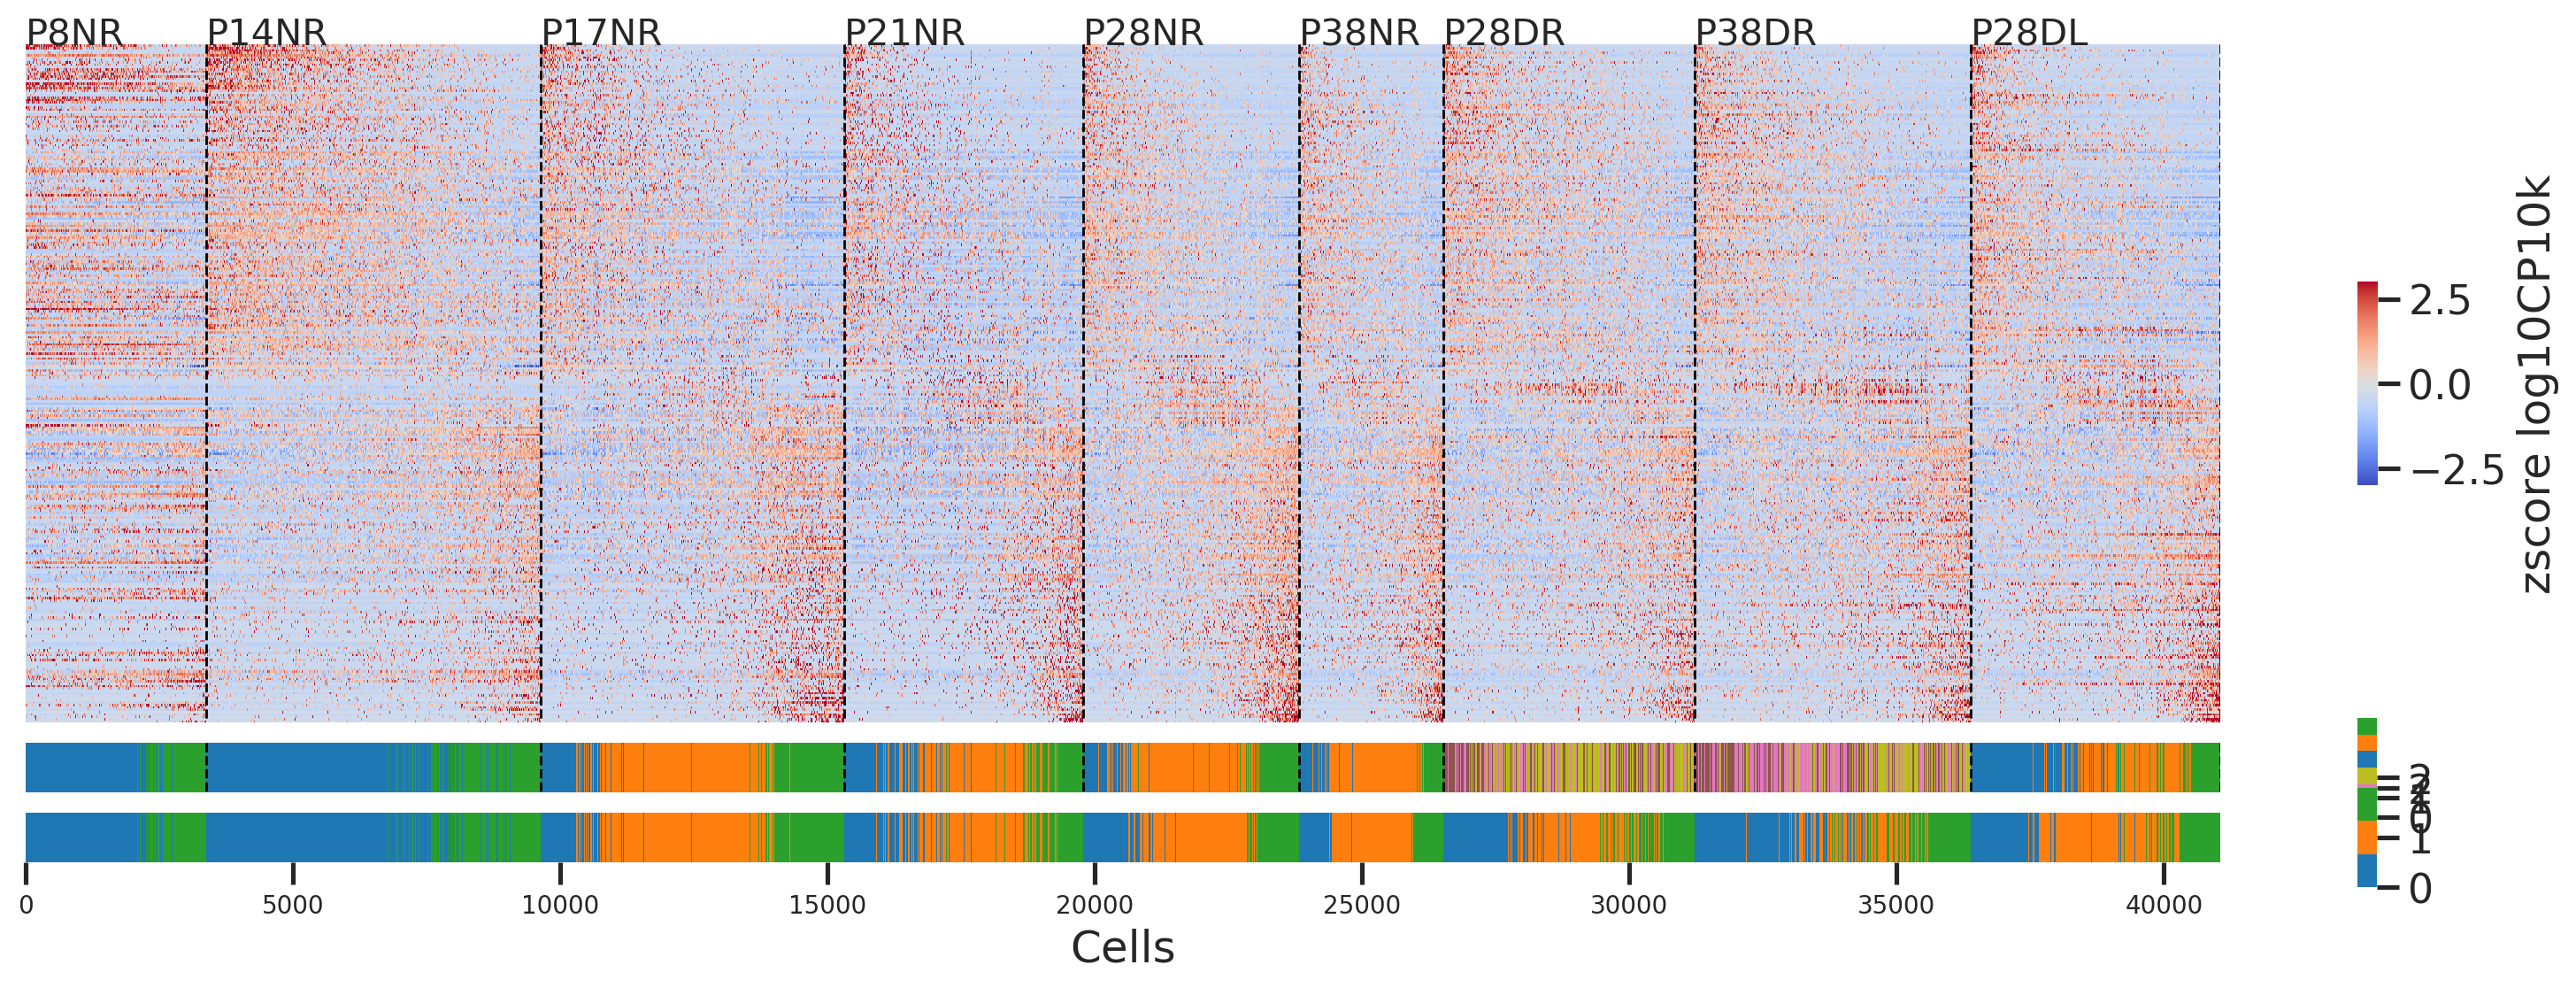

In [27]:
print(np.percentile(bigmat, [0,5,95,100]))

fig, axdict = plot_v2(bigmat, np.arange(len(bigmat)), geneidx, 
                      bigtypes, bigtypes_new, 
                      cmap_d2, cmap_d1,
                      figsize=(20,6), xticklabels=5000, hratio=50)
axdict['A'].vlines(np.cumsum(ncases), 0, bigmat.shape[1], color='k', linestyle='--', linewidth=1)
axdict['C'].vlines(np.cumsum(ncases), 0, 1, color='k', linestyle='--', linewidth=1)
for x, case in zip(np.hstack([[0], np.cumsum(ncases)]), cases):
    axdict['A'].text(x, 0, case, fontsize=15)
    
output = os.path.join(outfigdir, 'everything_heatmap.pdf')
powerplots.savefig_autodate(fig, output)
plt.show()

[-4.38444328 -0.99344778  2.02159657 11.47321129]
saved the figure to: /u/home/f/f7xiesnm/project-zipursky/v1-bb/ms_reanalysis/everything_heatmap_v2_2023-10-26.pdf


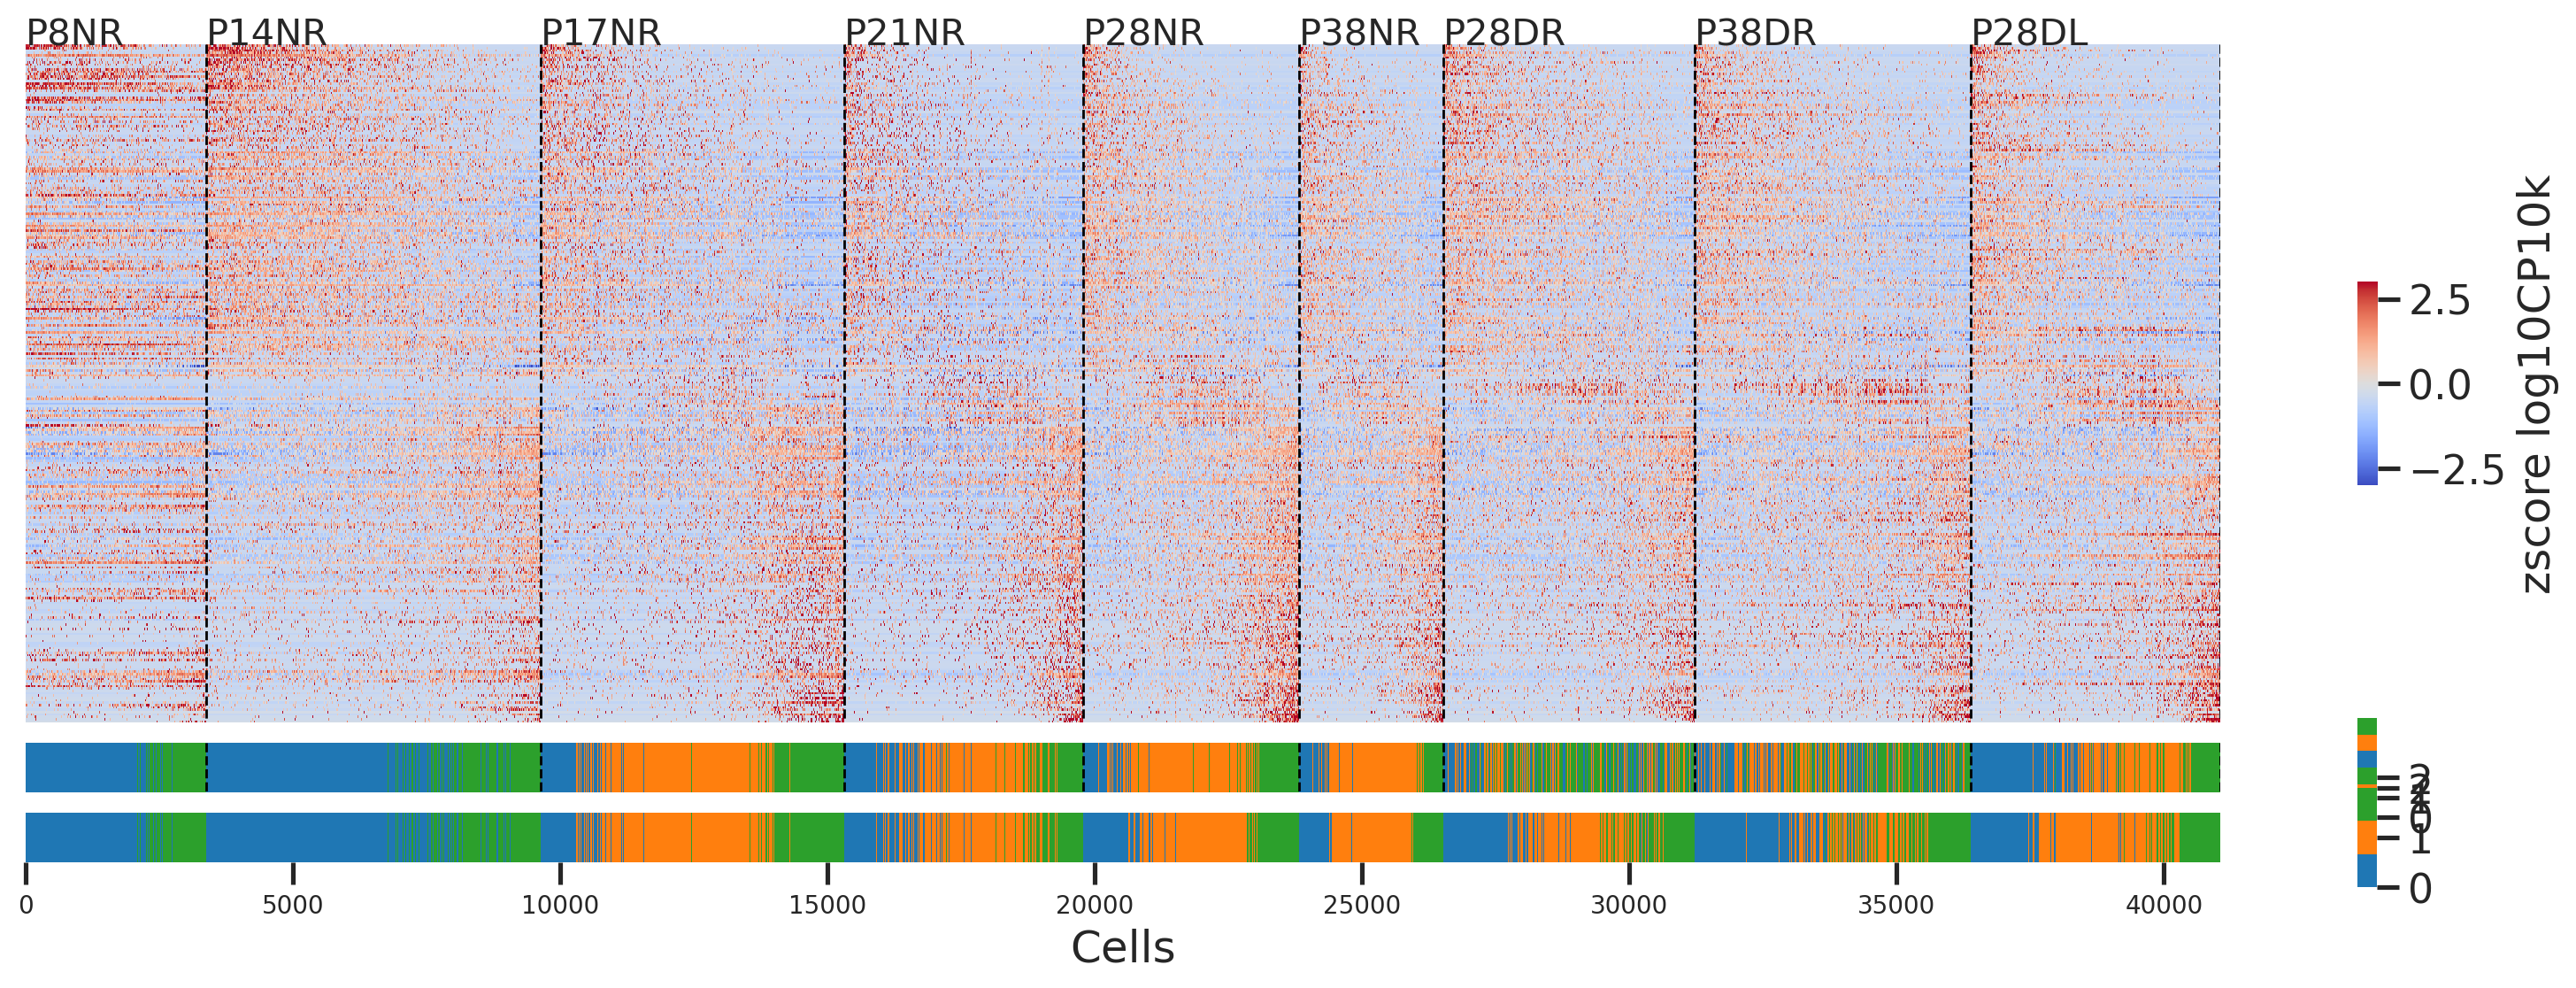

In [28]:
print(np.percentile(bigmat, [0,5,95,100]))

fig, axdict = plot_v2(bigmat, np.arange(len(bigmat)), geneidx, 
                      bigtypes, bigtypes_new, 
                      cmap_d2v2, cmap_d1,
                      figsize=(20,6), xticklabels=5000, hratio=50)
axdict['A'].vlines(np.cumsum(ncases), 0, bigmat.shape[1], color='k', linestyle='--', linewidth=1)
axdict['C'].vlines(np.cumsum(ncases), 0, 1, color='k', linestyle='--', linewidth=1)
for x, case in zip(np.hstack([[0], np.cumsum(ncases)]), cases):
    axdict['A'].text(x, 0, case, fontsize=15)
    
output = os.path.join(outfigdir, 'everything_heatmap_v2.pdf')
powerplots.savefig_autodate(fig, output)
plt.show()

# Specific genes

In [29]:
genes_subsel = [
    'Cdh13', 
    'Adamts2', 
    
    'Trpc6', 
    'Baz1a', 
    
    'Chrm2', 
    'Grik3', 
]
genes_grp_subsel = np.array([
    'A', 'A', 
    'B', 'B',
    'C', 'C',
])
gidx_subsel = basicu.get_index_from_array(genes_sel, genes_subsel)
gidx_subsel


array([ 11,  10, 137, 149, 200, 167])

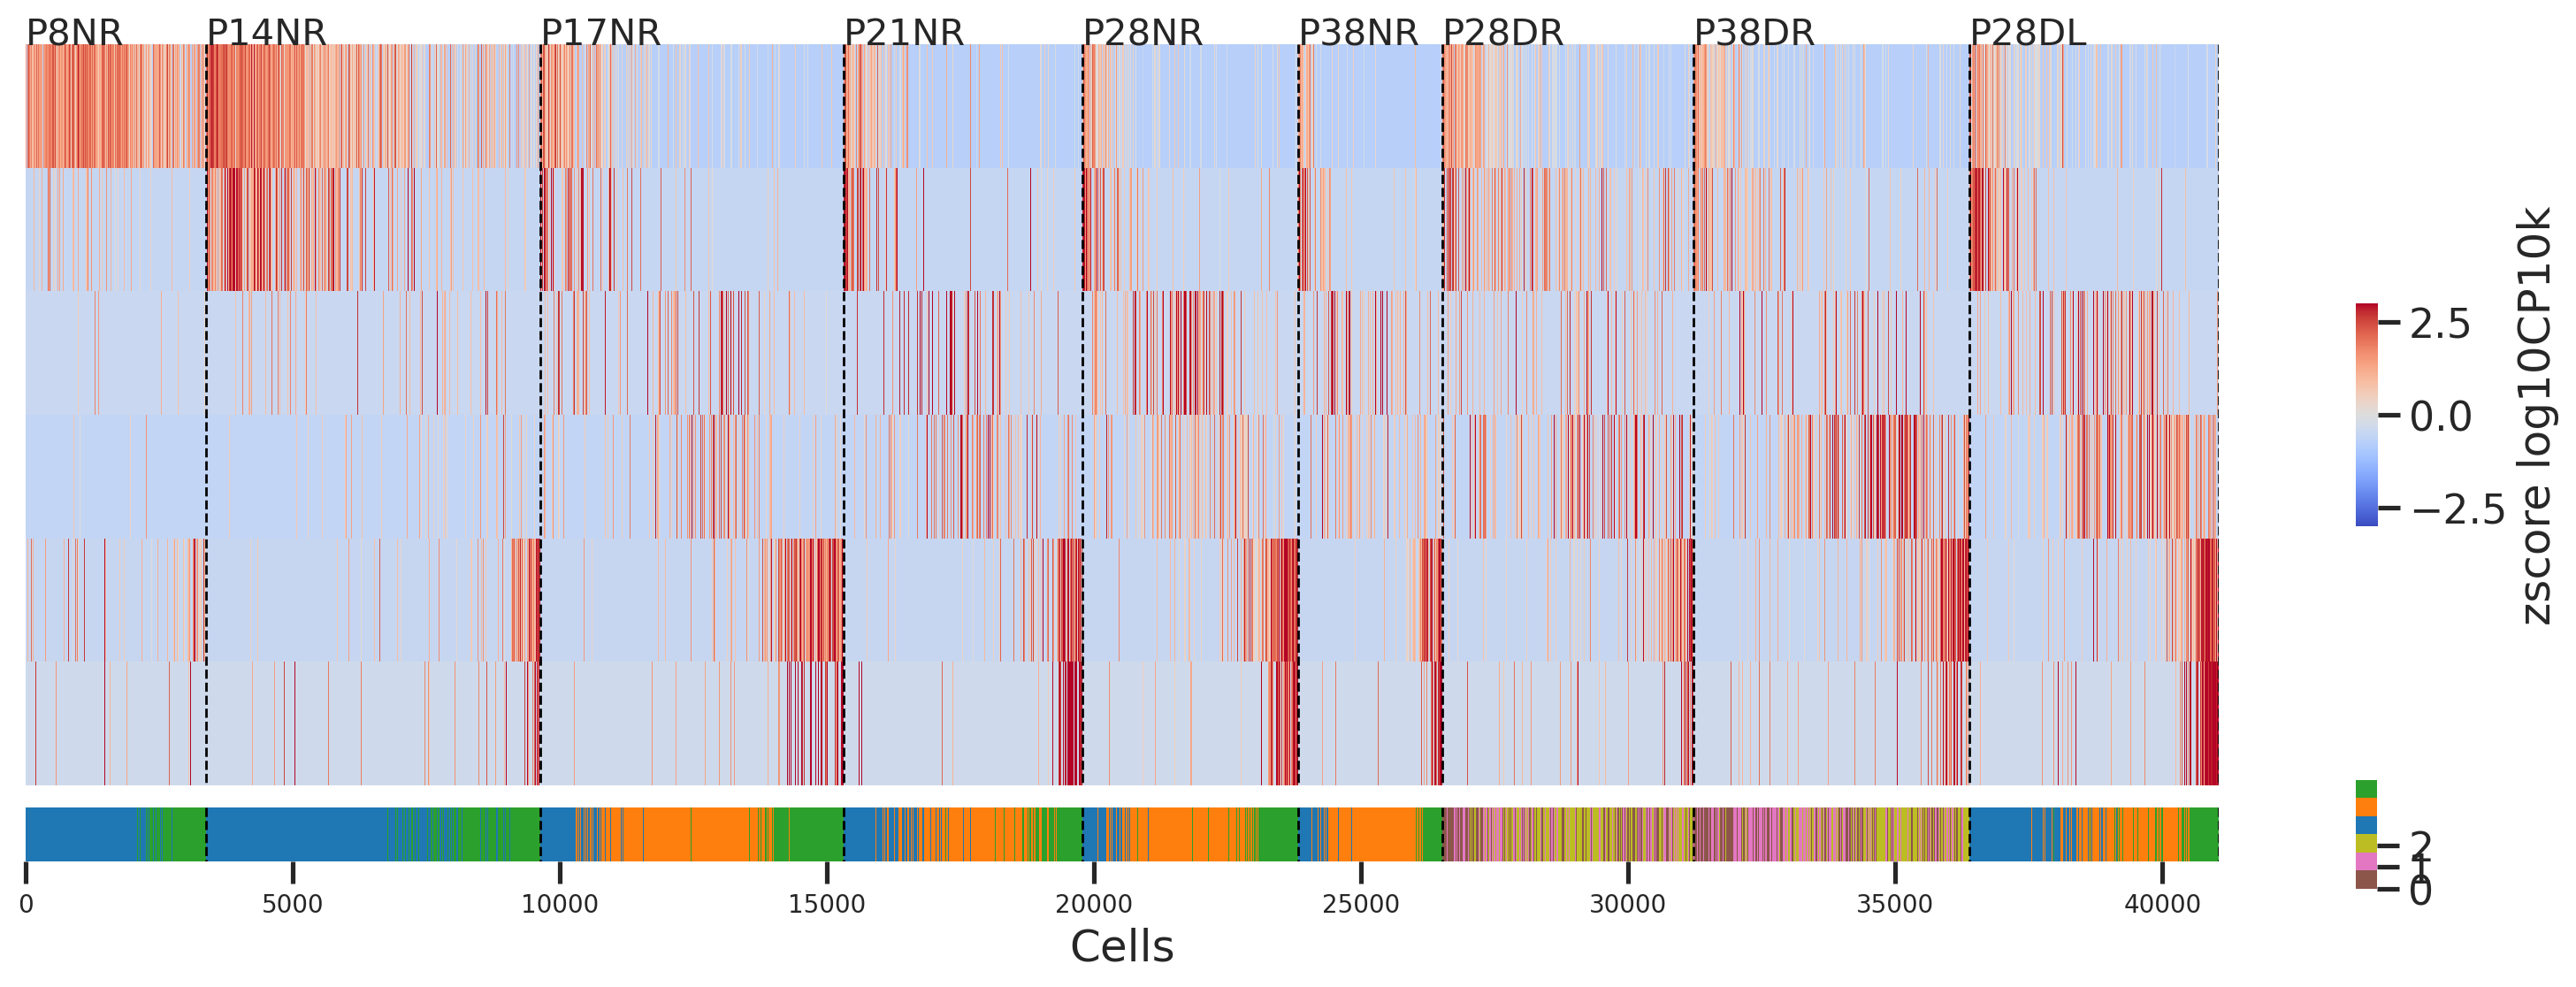

In [30]:
fig, axdict = plot_v3(bigmat[:,gidx_subsel], np.arange(len(bigmat)), 
                   np.arange(len(genes_subsel)), bigtypes, cmap_d2, 
                   figsize=(20,6), xticklabels=5000, yticklabels=genes_subsel, hratio=50)

axdict['A'].vlines(np.cumsum(ncases), 0, bigmat.shape[1], color='k', linestyle='--', linewidth=1)
axdict['D'].vlines(np.cumsum(ncases), 0, 1, color='k', linestyle='--', linewidth=1)
for x, case in zip(np.hstack([[0], np.cumsum(ncases)]), cases):
    axdict['A'].text(x, 0, case, fontsize=15)
plt.show()

# Collapse into types
- ordered by time and replicates

In [31]:
groups = adata.obs['easicond'].astype(str) + "_" + adata.obs['easitype2'].astype(str) + "_" + adata.obs['easibiosample'].astype(str)
print(groups.shape, counts.shape)
_clsts, _, _, logcpm = basicu.counts_to_bulk_profiles(counts, groups.values)
logcpm = logcpm[:,gi]
zlogcpm = zscore(logcpm, axis=0)

(41048,) (41048, 53801)


In [32]:
typesonly = pd.Series(_clsts).apply(lambda x: "_".join(x.split('_')[1:3])).values
condsonly = pd.Series(_clsts).apply(lambda x: x.split('_')[0]).values
unq, inv, cnts = np.unique(condsonly, return_counts=True, return_inverse=True)
unq, inv, cnts

(array(['1-P08NR', '1-P14NR', '1-P17NR', '1-P21NR', '1-P28NR', '1-P38NR',
        '2-P28DR', '2-P38DR', '3-P28DL'], dtype=object),
 array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4,
        4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7,
        8, 8, 8, 8, 8, 8]),
 array([4, 4, 6, 6, 6, 6, 6, 6, 6]))

[-3.50574929 -1.63900368  1.56696838  3.44959479]


<Axes: >

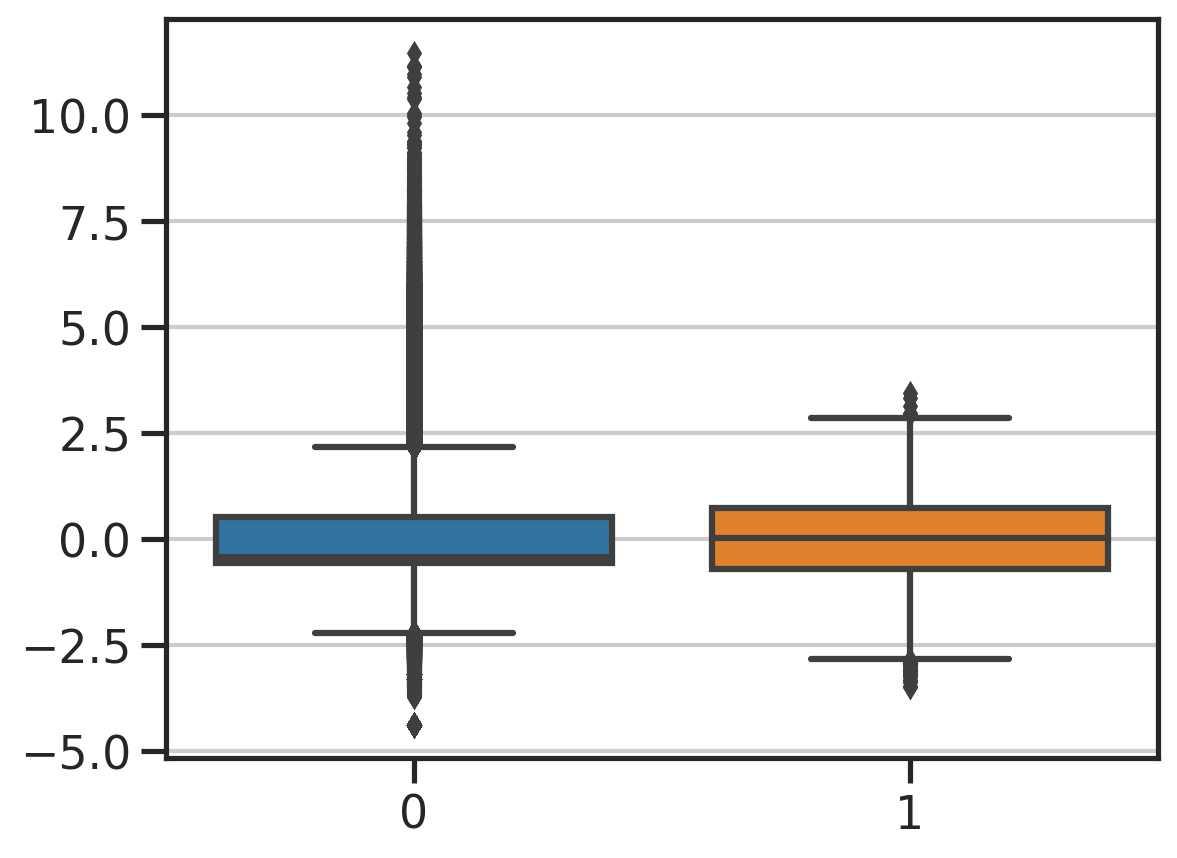

In [33]:
print(np.percentile(zlogcpm, [0,5,95,100]))
sns.boxplot([np.ravel(bigmat), np.ravel(zlogcpm)])

saved the figure to: /u/home/f/f7xiesnm/project-zipursky/v1-bb/ms_reanalysis/everything_heatmap_cluster_2023-10-26.pdf


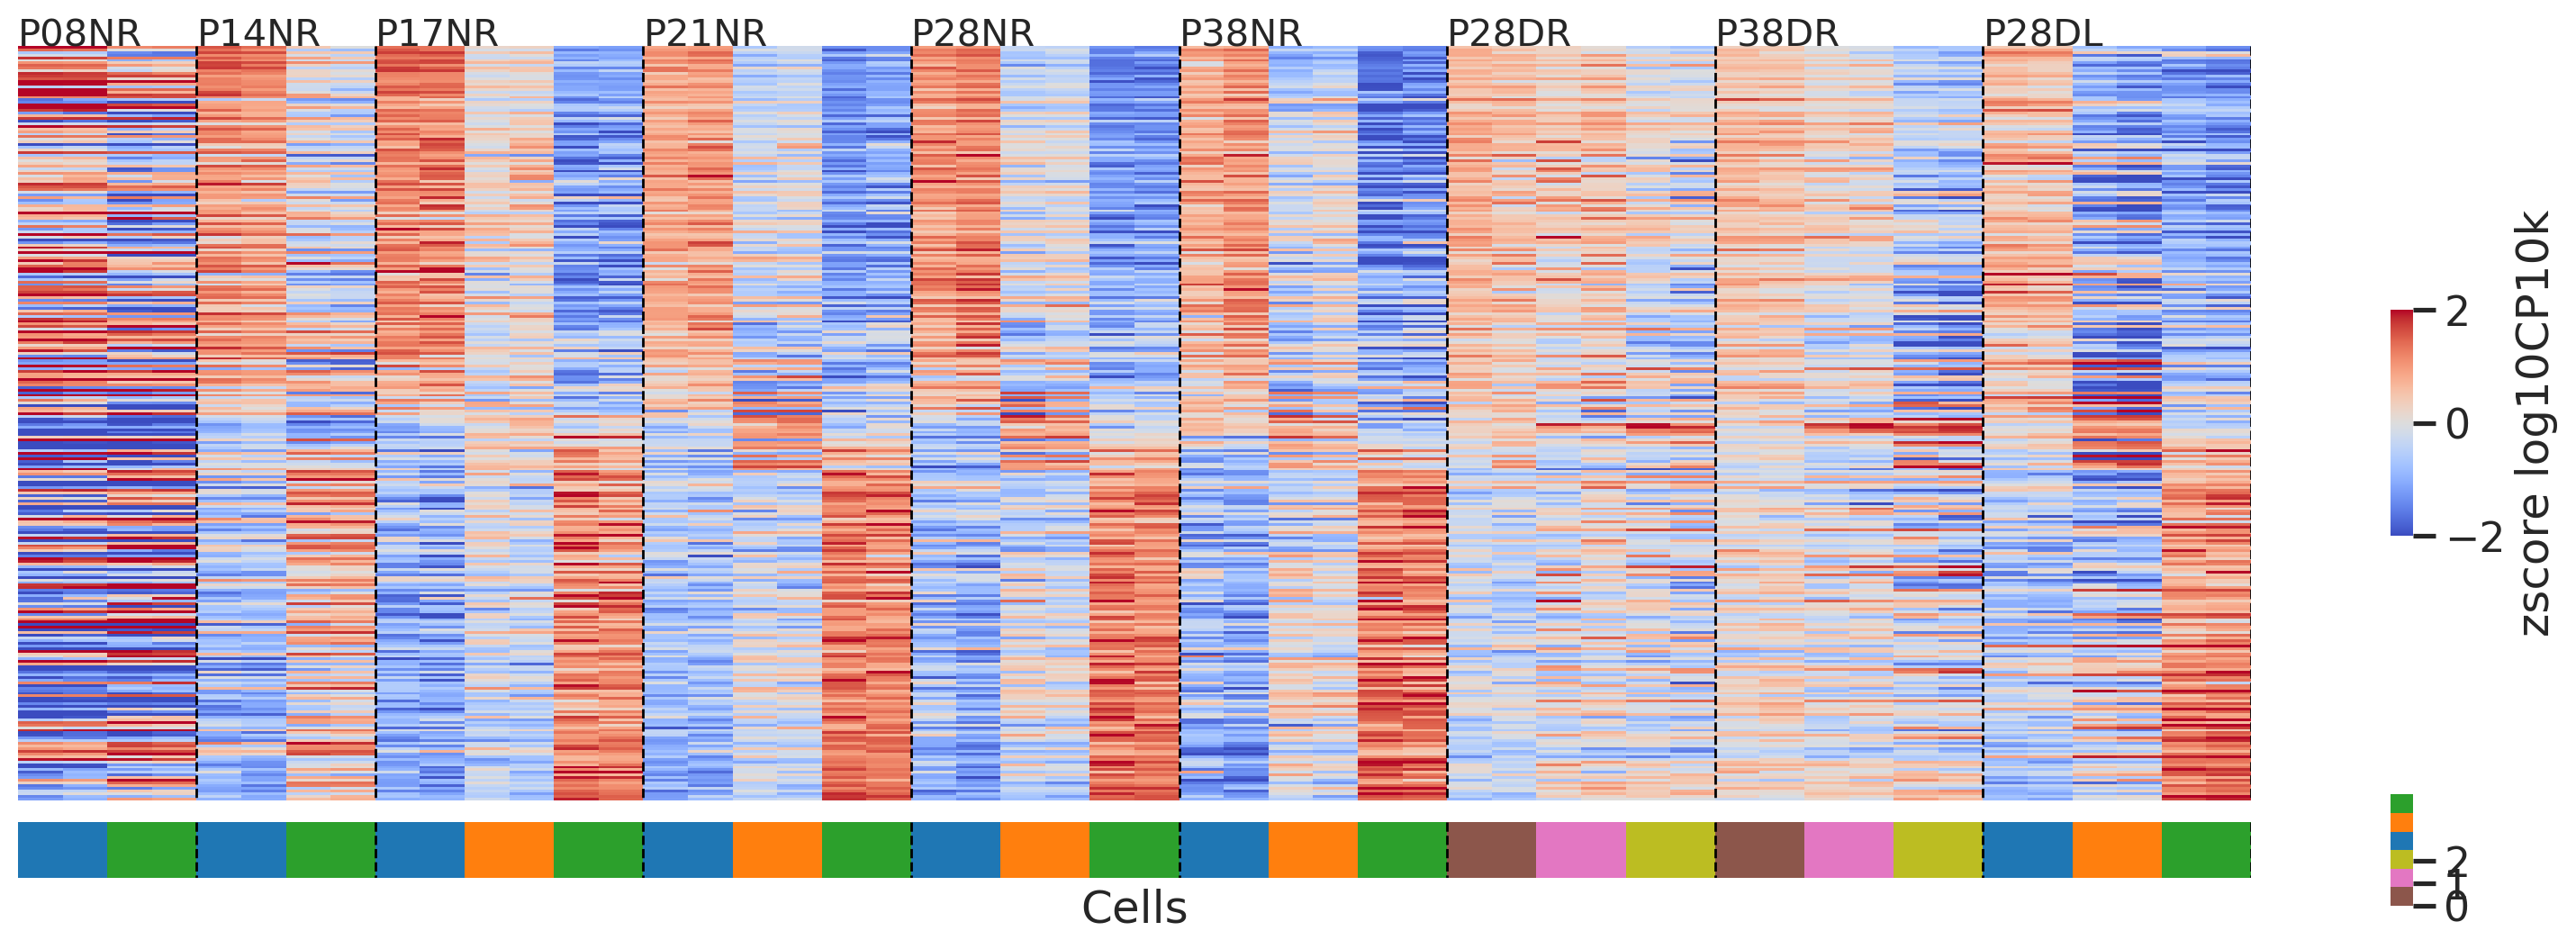

In [34]:
fig, axdict = plot_v3(zlogcpm, np.arange(len(zlogcpm)), geneidx, 
                      typesonly, cmap_d2, 
                      vmax=2, vmin=-2,
                   figsize=(20,6), xticklabels=False, hratio=50)

labels = pd.Series(unq).apply(lambda x: x.split('-')[1]).values
intvls = cnts

axdict['A'].vlines(np.cumsum(intvls), 0, zlogcpm.shape[1], color='k', linestyle='--', linewidth=1)
axdict['D'].vlines(np.cumsum(intvls), 0, 1, color='k', linestyle='--', linewidth=1)
for x, case in zip(np.hstack([[0], np.cumsum(intvls)]), labels):
    axdict['A'].text(x, 0, case, fontsize=15)
    
output = os.path.join(outfigdir, 'everything_heatmap_cluster.pdf')
powerplots.savefig_autodate(fig, output)
plt.show()

# Collapse into new types
- recluster DR and DL using the 286 genes only

In [35]:
# fout = os.path.join(outdir, "allL23_newtypes.csv")
# meta.to_csv(fout, header=True, index=True)

In [36]:
# meta = adata.obs.copy()

In [37]:
# meta['newtype'] = meta['easitype'].copy()
# names = np.array(["L2/3_A","L2/3_B","L2/3_C"])

# for case in ['P28DR', 'P38DR', 'P28DL', 'P28NR', 'P38NR']:
#     adatasub = adata[adata.obs['cond']==case] #].str.contains('P28|P38')]
#     ftrs = np.array(adatasub.layers['zlog10CP10k'])
#     cells = adatasub.obs.index.values
#     lbls = KMeans(n_clusters=3, n_init=10, random_state=0).fit_predict(ftrs)

#     # figure out which is which
#     mftrs, _ = basicu.group_mean(ftrs, lbls)
#     ai = np.argmax(np.mean(mftrs[:,geneidx[:10]] , axis=1)) 
#     ci = np.argmax(np.mean(mftrs[:,geneidx[-10:]], axis=1))
#     bi = [i for i in [0,1,2] if i not in [ai, ci]][0]
#     print(ai, bi, ci)
#     names[ai] = 'L2/3_A'
#     names[bi] = 'L2/3_B'
#     names[ci] = 'L2/3_C'
    
#     newtypes = names[lbls] # 
#     meta.loc[cells, 'newtype'] = newtypes

In [38]:
groups = adata.obs['easicond'].astype(str) + "_" + adata.obs['newtype'].astype(str) + "_" + adata.obs['easibiosample'].astype(str)
print(groups.shape, counts.shape)
_clsts, _, _, logcpm = basicu.counts_to_bulk_profiles(counts, groups.values)
logcpm = logcpm[:,gi]
zlogcpm = zscore(logcpm, axis=0)

(41048,) (41048, 53801)


In [39]:
typesonly = pd.Series(_clsts).apply(lambda x: "_".join(x.split('_')[1:3])).values
condsonly = pd.Series(_clsts).apply(lambda x: x.split('_')[0]).values
unq, inv, cnts = np.unique(condsonly, return_counts=True, return_inverse=True)
unq, inv, cnts

(array(['1-P08NR', '1-P14NR', '1-P17NR', '1-P21NR', '1-P28NR', '1-P38NR',
        '2-P28DR', '2-P38DR', '3-P28DL'], dtype=object),
 array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4,
        4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7,
        8, 8, 8, 8, 8, 8]),
 array([4, 4, 6, 6, 6, 6, 6, 6, 6]))

saved the figure to: /u/home/f/f7xiesnm/project-zipursky/v1-bb/ms_reanalysis/everything_heatmap_focused_cluster_2023-10-26.pdf


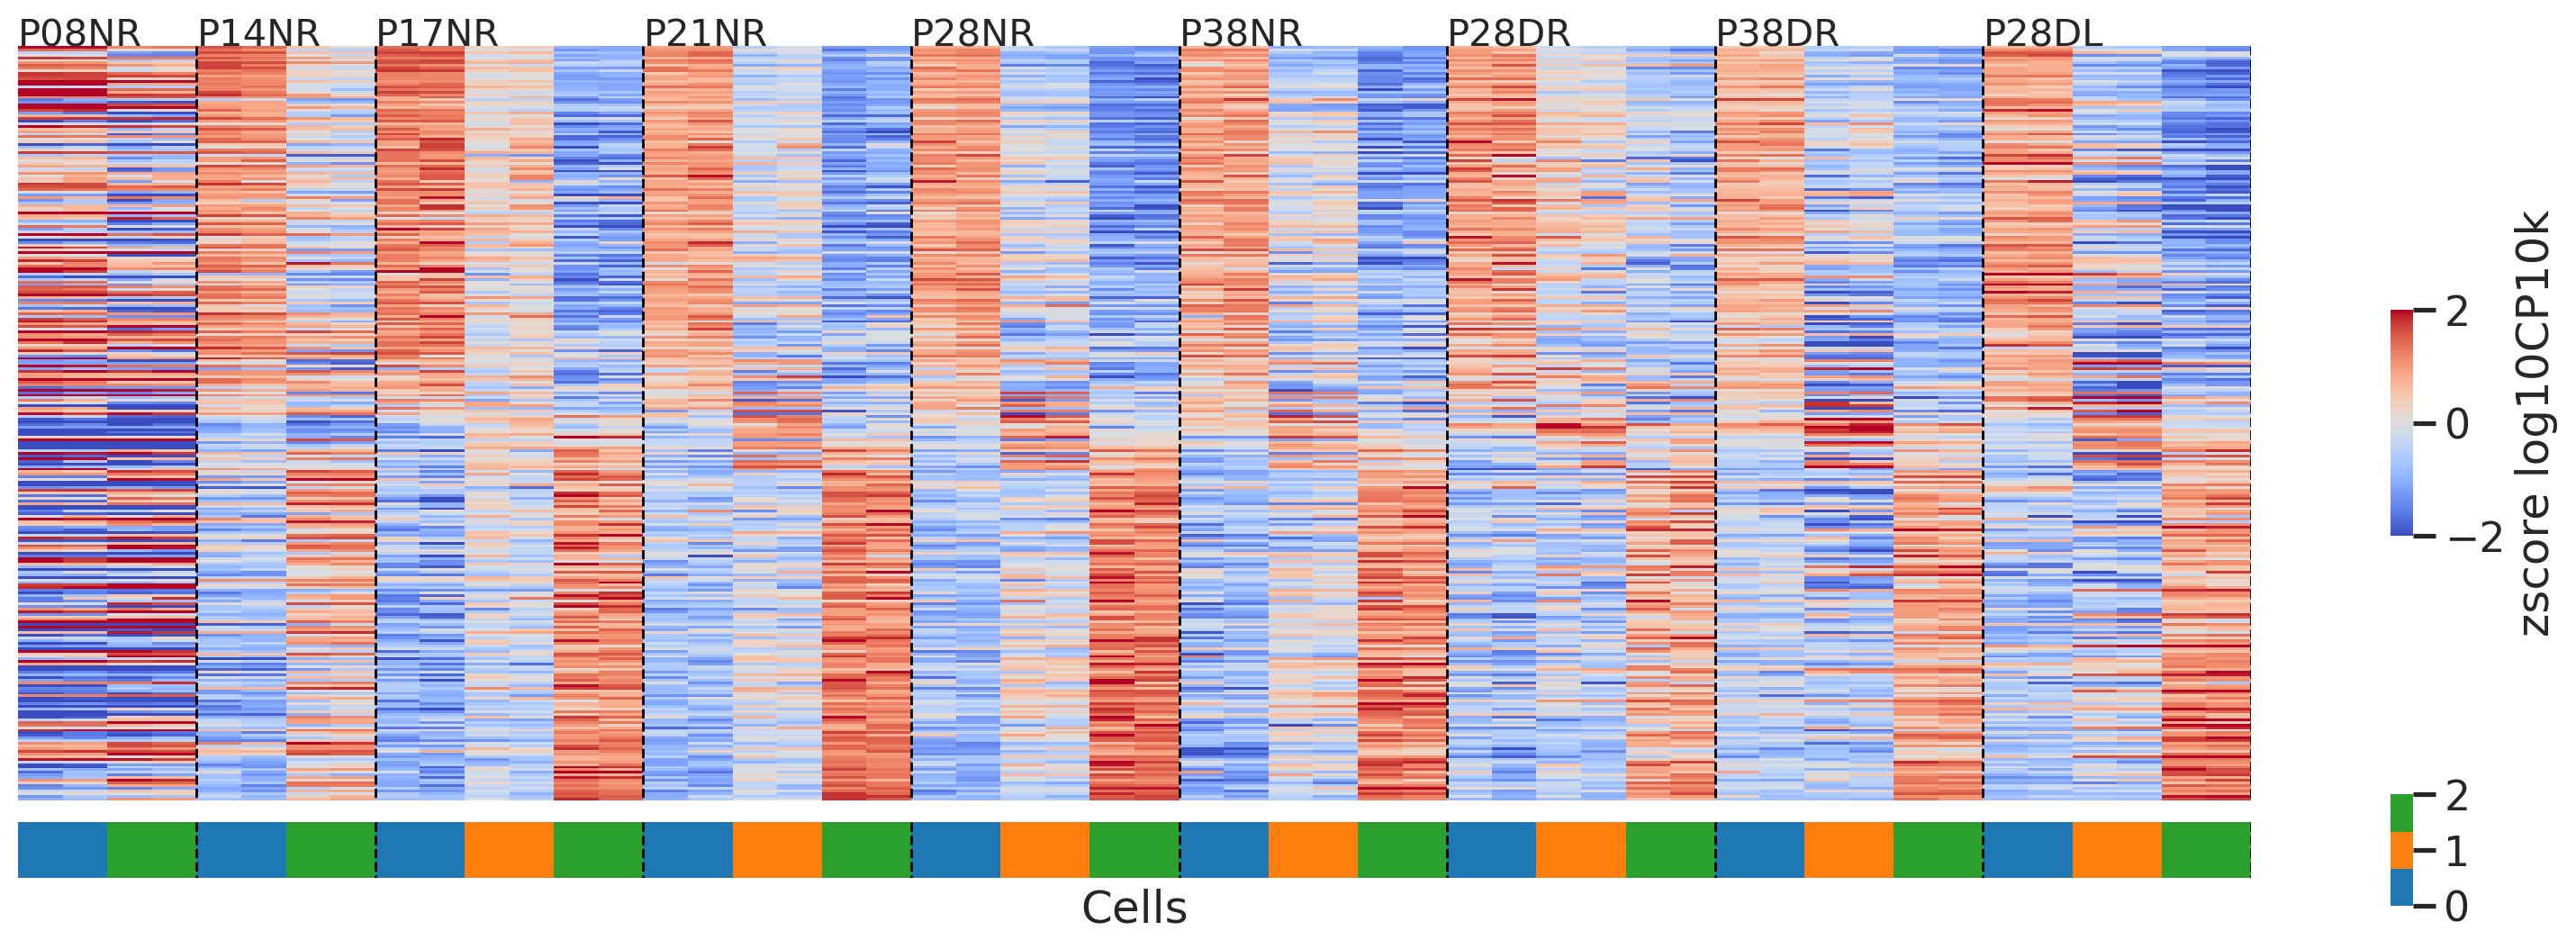

In [40]:
fig, axdict = plot_v3(zlogcpm, np.arange(len(zlogcpm)), geneidx, 
                      typesonly, cmap_d1, 
                      vmax=2, vmin=-2,
                   figsize=(20,6), xticklabels=False, hratio=50)

labels = pd.Series(unq).apply(lambda x: x.split('-')[1]).values
intvls = cnts

axdict['A'].vlines(np.cumsum(intvls), 0, zlogcpm.shape[1], color='k', linestyle='--', linewidth=1)
axdict['D'].vlines(np.cumsum(intvls), 0, 1, color='k', linestyle='--', linewidth=1)
for x, case in zip(np.hstack([[0], np.cumsum(intvls)]), labels):
    axdict['A'].text(x, 0, case, fontsize=15)
    
output = os.path.join(outfigdir, 'everything_heatmap_focused_cluster.pdf')
powerplots.savefig_autodate(fig, output)
plt.show()